In [1]:
#まず、データをdownloadします　
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!ls

--2020-05-10 23:16:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   300KB/s    in 0.3s    

2020-05-10 23:16:04 (300 KB/s) - ‘winequality-red.csv’ saved [84199/84199]

sample_data  winequality-red.csv


In [0]:
# データを読み込み、表示する
import pandas as pd
df = pd.read_csv('winequality-red.csv', header=0,  sep=";")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



特徴量: fixed acidity
モデル: quality = 0.10014898994431622 * fixed acidity + 5.6360225140712945
MSE: 0.6417307196439609


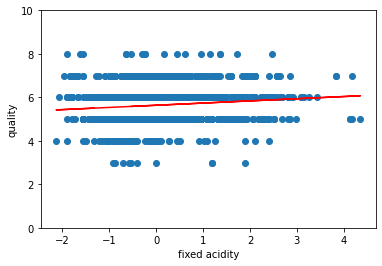


特徴量: volatile acidity
モデル: quality = -0.3153038874367113 * volatile acidity + 5.6360225140712945
MSE: 0.5523439983981253


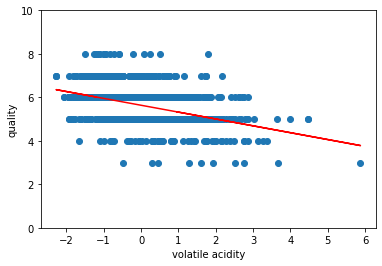


特徴量: citric acid
モデル: quality = 0.18275435128971862 * citric acid + 5.6360225140712945
MSE: 0.6183613869155018


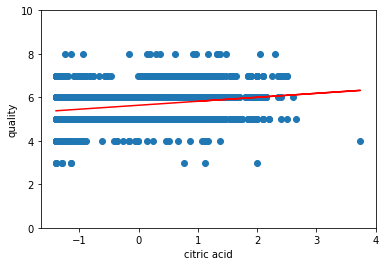


特徴量: residual sugar
モデル: quality = 0.011085782572983883 * residual sugar + 5.6360225140712945
MSE: 0.6516376452555722


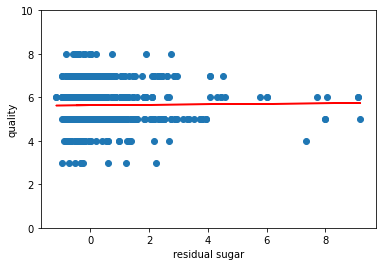


特徴量: chlorides
モデル: quality = -0.10406844138289652 * chlorides + 5.6360225140712945
MSE: 0.6409302993389623


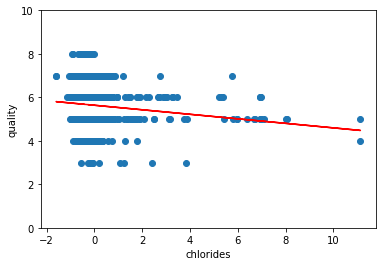


特徴量: free sulfur dioxide
モデル: quality = -0.040895489933756364 * free sulfur dioxide + 5.6360225140712945
MSE: 0.6500880987339057


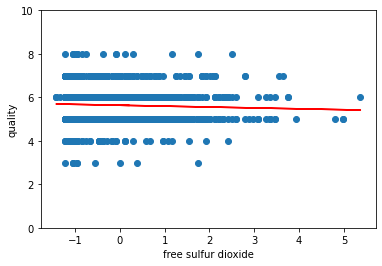


特徴量: total sulfur dioxide
モデル: quality = -0.1494345871812975 * total sulfur dioxide + 5.6360225140712945
MSE: 0.6294298439847829


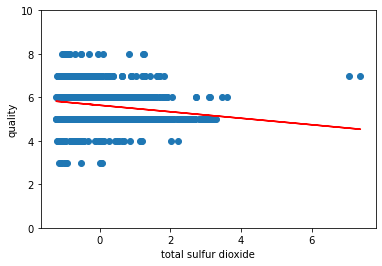


特徴量: density
モデル: quality = -0.14121524469500032 * density + 5.636022514071298
MSE: 0.6318187944965589


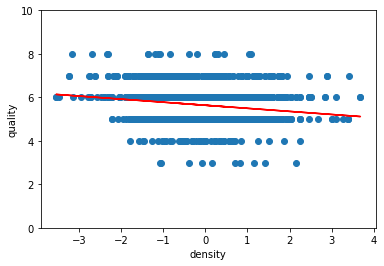


特徴量: pH
モデル: quality = -0.046607526450713234 * pH + 5.6360225140712945
MSE: 0.6495882783089737


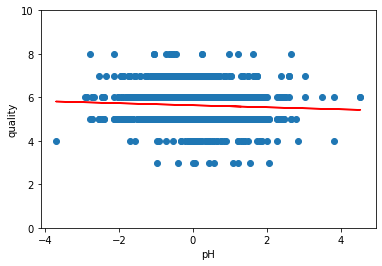


特徴量: sulphates
モデル: quality = 0.20295710475205558 * sulphates + 5.6360225140712945
MSE: 0.6105689534614908


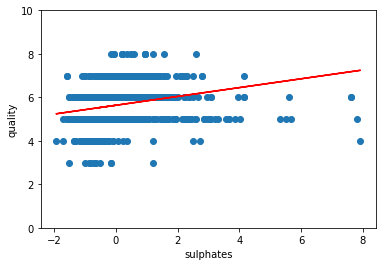


特徴量: alcohol
モデル: quality = 0.38441710960800235 * alcohol + 5.6360225140712945
MSE: 0.5039840256714571


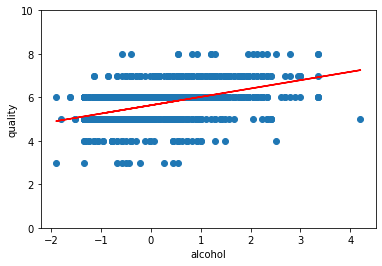

In [0]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import io

#　モデルを定義します
clf = linear_model.LinearRegression(fit_intercept=True,
                                    normalize=True,  
                                    copy_X=True)

# 利用する特徴量リスト
featureName=['fixed acidity', 'volatile acidity', 'citric acid', 
             'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# 予測したい目標値
objectiveName='quality'

for feature in featureName:

  # 特徴量featureのみのデータを作成
  X = df.loc[:, [feature]].values
  scaler = StandardScaler()
  Xstd = scaler.fit_transform(X)

  # 目標値のデータを作成
  y = df[objectiveName].values
    
  #　線警戒機のモデルを学習
  clf.fit(Xstd, y)

  # 学習結果をプリントアウト
  print(f"\n特徴量: {feature}")
  print(f"モデル: {objectiveName} = {clf.coef_[0]} * {feature} + {clf.intercept_}")
  print(f'MSE: {mean_squared_error(clf.predict(Xstd), y)}')

  # データと学習した線形モデルを可視化
  plt.scatter(Xstd, y)
  plt.plot(Xstd, clf.predict(Xstd), color='r')
  plt.ylabel("quality")
  plt.xlabel(feature)
  plt.ylim(0,10)
  plt.show()